# Example DRS Imager Processing

## Installation

In [ ]:
%pip install --upgrade pip setuptools wheel
!git clone https://github.com/oirlab/liger_iris_pipeline.git
%pip install ./liger_iris_pipeline[test]

## Imports

In [ ]:
import liger_iris_pipeline
from liger_iris_pipeline.tests.utils import download_osf_file # For downloading test data
import numpy as np
from astropy import units
import matplotlib.pyplot as plt

## Level 0 &rarr; Level 1 (Ramp level corrections and fitting)

In [14]:
# Imager data of M13 stars
sci_L0_filepath = download_osf_file('Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas.fits', use_cached=True)
#sci_L0_filepath = '/Users/cale/Desktop/Liger_IRIS_Test_Data/Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas.fits'
pipeline = liger_iris_pipeline.Stage1Pipeline()
pipeline.ramp_fit.method = 'ols'
nonlincoeff_path = download_osf_file('Liger/Cals/Liger_IMG_NONLINCOEFF_20240924000000_0.0.1.fits', use_cached=True)
pipeline.nonlinear_correction.nonlincoeff = nonlincoeff_path
model_result = pipeline.run(sci_L0_filepath)

Checking /Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas.fits against Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas.fits...


100%|██████████| 336M/336M [00:08<00:00, 40.3Mbytes/s] 
2025-05-29 09:57:40,910 - stpipe.Stage1Pipeline - INFO - Stage1Pipeline instance created.
2025-05-29 09:57:40,913 - stpipe.NonlinearCorrectionStep - INFO - NonlinearCorrectionStep instance created.
2025-05-29 09:57:40,914 - stpipe.FitRampStep - INFO - FitRampStep instance created.
2025-05-29 09:57:41,014 - stpipe.Stage1Pipeline - INFO - Step Stage1Pipeline parameters are:
  output_file: None
  output_dir: None
  save_results: False
  skip: False
  suffix: None
2025-05-29 09:57:41,015 - stpipe.Stage1Pipeline - INFO - First argument /Users/cale/.astropy/cache/download/url/Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas.fits does not appear to be a model
2025-05-29 09:57:41,213 - stpipe.NonlinearCorrectionStep - INFO - Step NonlinearCorrectionStep parameters are:
  output_file: None
  output_dir: None
  save_results: False
  skip: False
  suffix: None
  nonlincoeff_ouput_dir: None
  nonlincoeff: /Users/cale/.astropy/cache

### Examine result

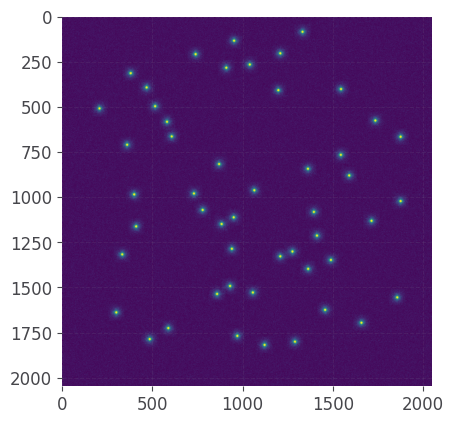

In [21]:
plt.imshow(model_result.data, vmin=0, vmax=np.quantile(model_result.data, .999))

## Level 1 &rarr; Level 2 (Standard calibrations, WCS assignment)

In [3]:
sci_L1_filepath = download_osf_file('Liger/L1/2024B-P001-001_Liger_IMG_SCI_LVL1_0001_M13-J-10mas.fits', use_cached=False)
sky_L1_filepath = download_osf_file('Liger/L1/2024B-P001-001_Liger_IMG_SKY_LVL1_0001_M13-J-10mas.fits', use_cached=True)
dark_filepath = download_osf_file('Liger/Cals/Liger_IMG_DARK_20240924000000_0.0.1.fits', use_cached=True)
flat_filepath = download_osf_file('Liger/Cals/Liger_IMG_FLAT_20240924000000_0.0.1.fits', use_cached=True)
pipeline = liger_iris_pipeline.ImagerStage2Pipeline()
pipeline.dark_sub.dark = dark_filepath
pipeline.flat_field.flat = flat_filepath
model_result = pipeline.run({'SCI': sci_L1_filepath, 'SKY' : sky_L1_filepath})

Checking /Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas.fits against Liger/L1/2024B-P001-001_Liger_IMG_SCI_LVL1_0001_M13-J-10mas.fits...
Checking /Liger/L1/2024B-P001-001_Liger_IMG_SKY_LVL1_0001_M13-J-10mas.fits against Liger/L1/2024B-P001-001_Liger_IMG_SCI_LVL1_0001_M13-J-10mas.fits...
Checking /Liger/L1/2024B-P001-001_Liger_IMG_SCI_LVL1_0001_M13-J-10mas.fits against Liger/L1/2024B-P001-001_Liger_IMG_SCI_LVL1_0001_M13-J-10mas.fits...


100%|██████████| 42.0M/42.0M [00:01<00:00, 26.9Mbytes/s]


Checking /Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas.fits against Liger/L1/2024B-P001-001_Liger_IMG_SKY_LVL1_0001_M13-J-10mas.fits...
Checking /Liger/L1/2024B-P001-001_Liger_IMG_SKY_LVL1_0001_M13-J-10mas.fits against Liger/L1/2024B-P001-001_Liger_IMG_SKY_LVL1_0001_M13-J-10mas.fits...


100%|██████████| 42.0M/42.0M [00:01<00:00, 28.8Mbytes/s]


Checking /Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas.fits against Liger/Cals/Liger_IMG_DARK_20240924000000_0.0.1.fits...
Checking /Liger/L1/2024B-P001-001_Liger_IMG_SKY_LVL1_0001_M13-J-10mas.fits against Liger/Cals/Liger_IMG_DARK_20240924000000_0.0.1.fits...
Checking /Liger/L1/2024B-P001-001_Liger_IMG_SCI_LVL1_0001_M13-J-10mas.fits against Liger/Cals/Liger_IMG_DARK_20240924000000_0.0.1.fits...
Checking /Liger/Cals/Liger_IMG_DARK_20240924000000_0.0.1.fits against Liger/Cals/Liger_IMG_DARK_20240924000000_0.0.1.fits...


100%|██████████| 42.0M/42.0M [00:01<00:00, 22.8Mbytes/s]


Checking /Liger/L0/2024B-P001-001_Liger_IMG_SCI_LVL0_0001_M13-J-10mas.fits against Liger/Cals/Liger_IMG_FLAT_20240924000000_0.0.1.fits...
Checking /Liger/L1/2024B-P001-001_Liger_IMG_SKY_LVL1_0001_M13-J-10mas.fits against Liger/Cals/Liger_IMG_FLAT_20240924000000_0.0.1.fits...
Checking /Liger/L1/2024B-P001-001_Liger_IMG_SCI_LVL1_0001_M13-J-10mas.fits against Liger/Cals/Liger_IMG_FLAT_20240924000000_0.0.1.fits...
Checking /Liger/Cals/Liger_IMG_DARK_20240924000000_0.0.1.fits against Liger/Cals/Liger_IMG_FLAT_20240924000000_0.0.1.fits...
Checking /Liger/Cals/Liger_IMG_NONLINCOEFF_20240924000000_0.0.1.fits against Liger/Cals/Liger_IMG_FLAT_20240924000000_0.0.1.fits...
Checking /Liger/Cals/Liger_IMG_FLAT_20240924000000_0.0.1.fits against Liger/Cals/Liger_IMG_FLAT_20240924000000_0.0.1.fits...


100%|██████████| 50.4M/50.4M [00:01<00:00, 32.0Mbytes/s]
2025-05-29 12:53:36,084 - stpipe.ImagerStage2Pipeline - INFO - ImagerStage2Pipeline instance created.
2025-05-29 12:53:36,088 - stpipe.ParseSubarrayMapStep - INFO - ParseSubarrayMapStep instance created.
2025-05-29 12:53:36,089 - stpipe.DarkSubtractionStep - INFO - DarkSubtractionStep instance created.
2025-05-29 12:53:36,090 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2025-05-29 12:53:36,091 - stpipe.SkySubtractionImagerStep - INFO - SkySubtractionImagerStep instance created.
2025-05-29 12:53:36,091 - stpipe.AssignWCSStep - INFO - AssignWCSStep instance created.
2025-05-29 12:53:36,152 - stpipe.ImagerStage2Pipeline - INFO - Step ImagerStage2Pipeline parameters are:
  output_file: None
  output_dir: None
  save_results: False
  skip: False
  suffix: None
2025-05-29 12:53:36,152 - stpipe.ImagerStage2Pipeline - INFO - First argument {'SCI': '/Users/cale/.astropy/cache/download/url/Liger/L1/2024B-P001-001_Liger_I

### Examine Results

Image shape: 2048 x 2048
World corners (RA, Dec):
  250.418990, 36.457018
  250.426060, 36.457018
  250.426060, 36.462704
  250.418990, 36.462704


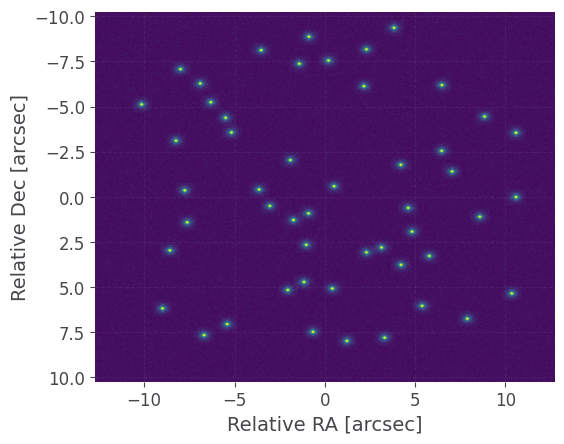

In [20]:
# Compute wcs corners
height, width = model_result.data.shape
print(f"Image shape: {height} x {width}")
corners = np.array([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]]) * units.pixel
world_corners = [model_result.meta.wcs(*corner) for corner in corners]
print("World corners (RA, Dec):")
for corner in world_corners:
    print(f"  {corner[0].value:.6f}, {corner[1].value:.6f}")
extent = [world_corners[0][0].value, world_corners[1][0].value, world_corners[2][1].value, world_corners[0][1].value]
dx = extent[1] - extent[0]
dy = extent[2] - extent[3]
extent = np.array([-dx / 2, dx / 2, dy / 2, -dy / 2]) * 3600

plt.imshow(model_result.data, extent=extent, vmin=0, vmax=np.quantile(model_result.data, .999))
#plt.xlim(-0.15, 0.15); plt.ylim(0.15, -0.15)
plt.xlabel("Relative RA [arcsec]"); plt.ylabel("Relative Dec [arcsec]")
plt.show()